<a href="https://colab.research.google.com/github/Sachinsn19/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Analysis
 dataset can be downloaded from :[train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)

In [309]:
#Loading data into Pandas Dataframe
titanic_data = pd.read_csv("/content/titanic.csv",index_col='PassengerId')

In [310]:
#Printing top five rows of the data
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [311]:
#Number of rows and columns
titanic_data.shape

(891, 11)

In [312]:
#Getting some basic informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [313]:
#Checking for missing values in each column
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

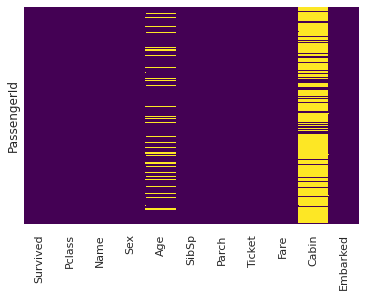

In [314]:
sns.heatmap(titanic_data.isnull(), yticklabels=False,cbar=False, cmap='viridis')

## Handling Missing values

In [315]:
#Dropping Cabin column
titanic_data.drop('Cabin', axis=1, inplace=True)

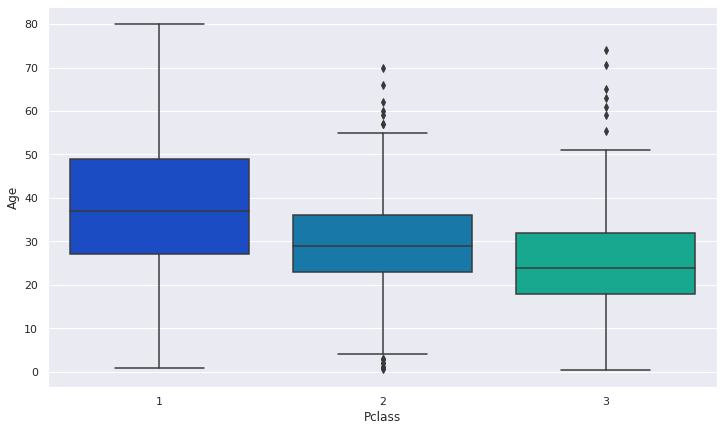

In [316]:
#Plotting boxplot of age by passenger class
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data, palette='winter')
plt.show()

In [317]:
titanic_data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [318]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return  26
  else:
    return Age

titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_age, axis=1)

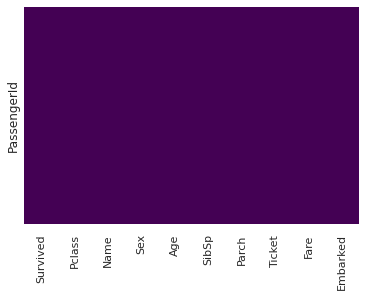

In [319]:
sns.heatmap(titanic_data.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [320]:
titanic_data['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [321]:
titanic_data['Embarked'].mode()

0    S
dtype: object

In [322]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [323]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [324]:
#Getting some Statistical measures of the data
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.371684,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.146817,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data visualization

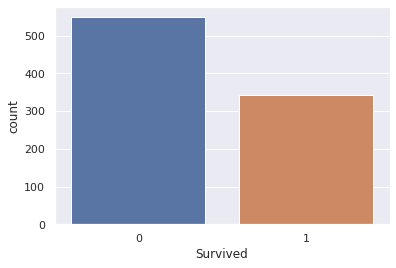

In [325]:
sns.set()

# making a count plot for "Survived" column
sns.countplot('Survived', data=titanic_data)
plt.show()

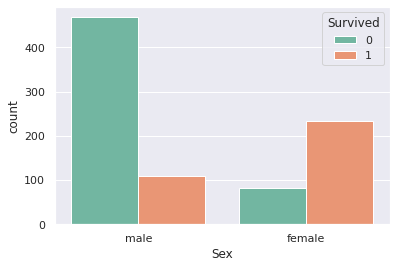

In [326]:
#Number of survivors by gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data,palette='Set2')
plt.show()

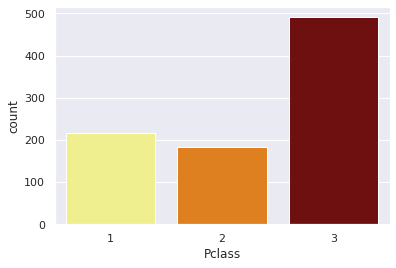

In [327]:
# making a count plot for Passenger class
sns.countplot('Pclass', data=titanic_data, palette='afmhot_r')
plt.show()

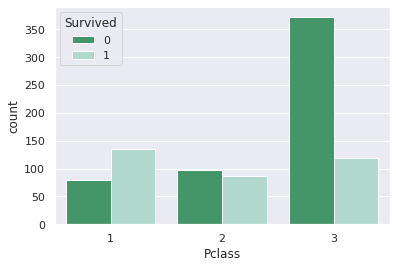

In [328]:
sns.countplot('Pclass',hue='Survived', data=titanic_data,palette='BuGn_r')
plt.show()

## Encoding Categorical columns

In [329]:
#Printing categorical columns
titanic_data.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [330]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [331]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [332]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [333]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## Seperating Features and Targets

In [334]:
X = titanic_data.drop(columns = ['Name','Ticket','Survived'], axis=1)
y = titanic_data['Survived']

In [335]:
print(X)
print(y)

             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
1                 3    0  22.0      1      0   7.2500         0
2                 1    1  38.0      1      0  71.2833         1
3                 3    1  26.0      0      0   7.9250         0
4                 1    1  35.0      1      0  53.1000         0
5                 3    0  35.0      0      0   8.0500         0
...             ...  ...   ...    ...    ...      ...       ...
887               2    0  27.0      0      0  13.0000         0
888               1    1  19.0      0      0  30.0000         0
889               3    1  26.0      1      2  23.4500         0
890               1    0  26.0      0      0  30.0000         1
891               3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]
PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtyp

## Train Test Split

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [337]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


## Model Training

In [338]:
model = LogisticRegression()

In [339]:
# training the Logistic Regression model with training data
model.fit(X_train,y_train)

LogisticRegression()

In [340]:
#Accuracy score on training data
train_data_prediction = model.predict(X_train)

train_data_accuracy = accuracy_score(y_train, train_data_prediction)*100

In [341]:
print("Accuracy score on Train data : ",train_data_accuracy)

Accuracy score on Train data :  82.16292134831461


In [342]:
#Accuracy score on test data
test_data_prediction = model.predict(X_test)

test_data_accuracy = accuracy_score(y_test, test_data_prediction)*100

print("Accuracy score on Test data : ",test_data_accuracy)


Accuracy score on Test data :  79.3296089385475


## .....................................THANK YOU................................